# Project 2 of Machine Learning - In collaboration with the MIP Lab (ML4Science project)
## Title: Predicting Brain Activity During Movie Watching: From the Movie Frames to the Brain
    
Team name : 
    
    Brainwave_Brigade

Team members :

    Florian David - SCIPER : 375252, email: florian.david@epfl.ch
    Sophie Meuwly - SCIPER : 375305, email: sophie.meuwly@epfl.ch
    Iris Segard - SCIPER : 310860, email: iris.segard@epfl.ch
    
Last update:

    21/12/2023

#### To note:

Because of the sensitive nature of the data (fMRI scans), only 1 preprocessed fMRI data and the corresponding preprocessed video are given with the rest of the code. Your folder must be structured as followed:

- your_folder
  - run.ipynb
  - dataset.py
  - model.py
  - visualisation.py
  - preprocessed_videos
    - Chatter.npz
  - masked_fMRI
    - Chatter.npz
Please make sure to download the 2 files from the link in the readme and then rename them both Chatter.npz after storing them in 2 distinct folders.

In [1]:
import torch

from dataset import * 
from visualisation import *
from model import *

%matplotlib inline

Load data:
fMRI: OK
Video: OK
Duration: OK
---
Spliting:
Chatter
Split time (minutes): 0.1385351618131002
---
Training on input of shape torch.Size([248, 3, 112, 112, 32])
Train Epoch: 1-0 batch_loss=2.27e+00, batch_cos_sim==-2.45e-02
Train Epoch: 2-0 batch_loss=1.04e+00, batch_cos_sim==-2.80e-02
Train Epoch: 3-0 batch_loss=1.12e+00, batch_cos_sim==8.43e-03
Train Epoch: 4-0 batch_loss=1.03e+00, batch_cos_sim==8.02e-01
Train Epoch: 5-0 batch_loss=9.34e-01, batch_cos_sim==6.91e-01
Train time (minutes): 1.758509373664856
---
Start testing:


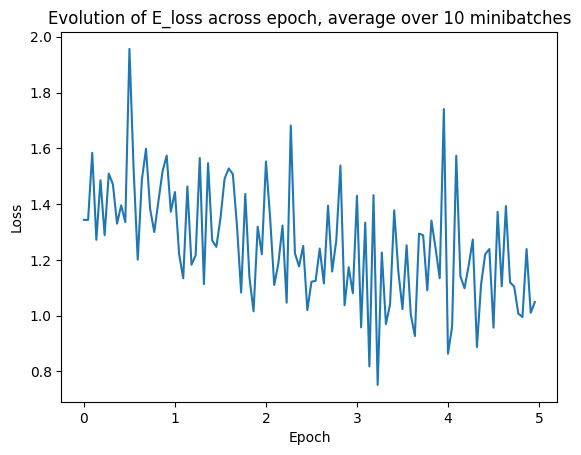

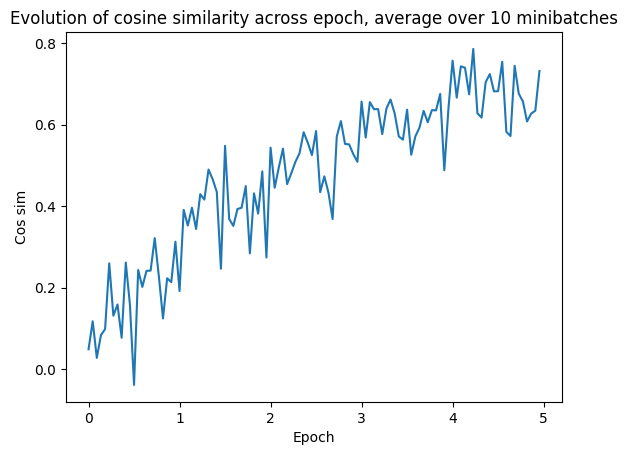

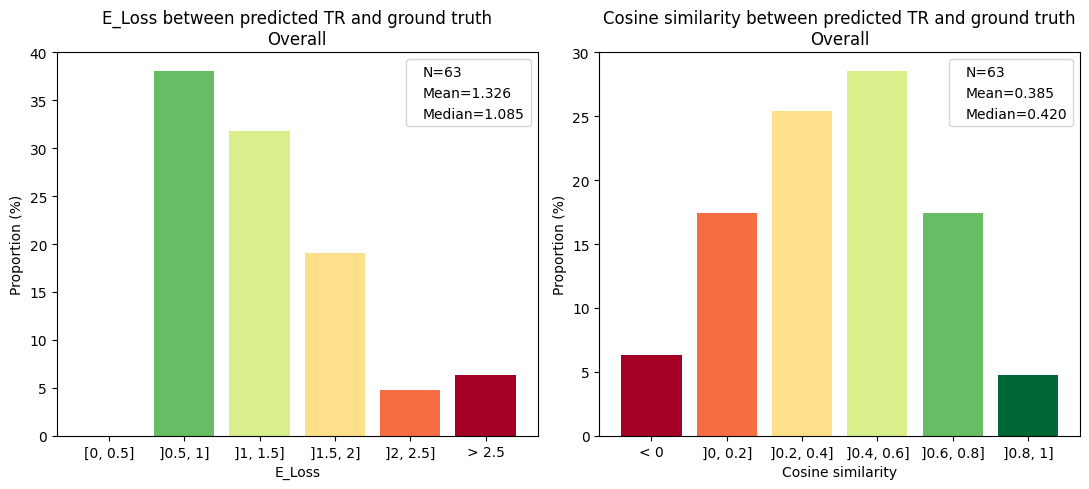

Test time (minutes): 2.752077353000641
---


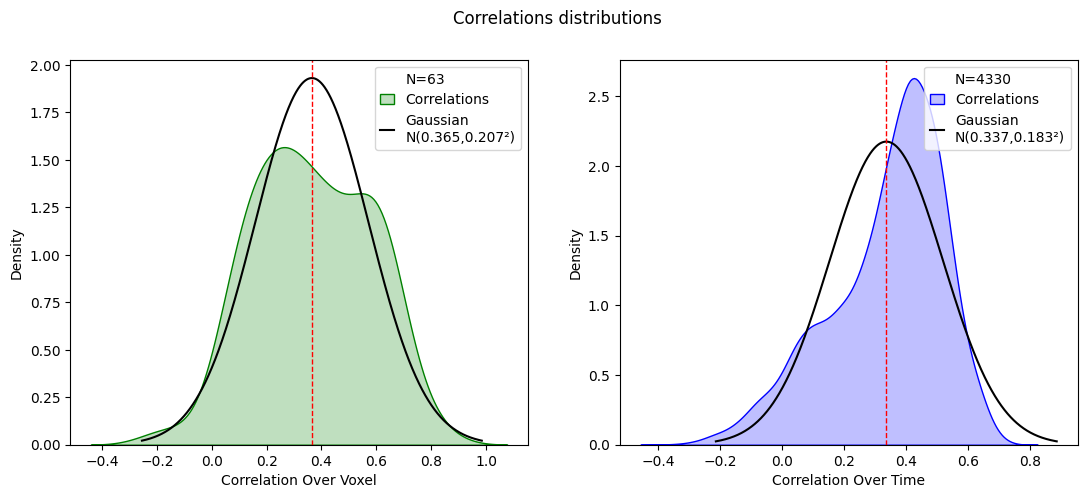

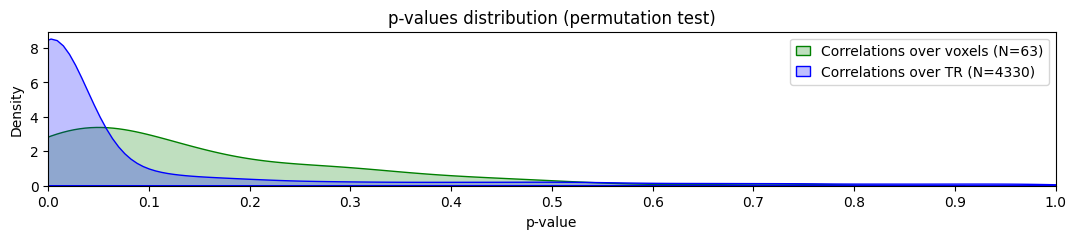

In [2]:
# select the videos you want to use. Here, you can only run on 1 video. You will find below all the other videos we used.
video_titles = ['Chatter']
                #'BigBuckBunny',
                #'Sintel',
                #'FirstBite',
                #'LessonLearned',
                #'Payload',
                #'Spaceman',
                #'Superhero',
                #'TearsOfSteel',
                #'TheSecretNumber',
                #'YouAgain',
                #'ToClaireFromSonny',
                #'BetweenViewings',
                #'AfterTheRain']

# define the parameters
shuffle = False
num_epochs = 5
learning_rate = 1e-4
batch_size = 1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
save_model_as = 'model_name'
plot_individual_results = False
permutation_testing = True

# split the dataset
train_input, train_label, test_inputs, test_labels = split_data(video_titles,
                                                                shuffle)

# train the model
trained_model = train_model(train_input,
                            train_label,
                            num_epochs,
                            learning_rate,
                            batch_size,
                            device,
                            save_model_as)

# evaluate the model
predictions, E_Losses, cos_sims = test_model(test_inputs,
                                             test_labels,
                                             trained_model,
                                             plot_individual_results)

# plot correlations
plot_correlations(predictions,
                  test_labels,
                  permutation_testing)